In [11]:
import json
import matplotlib.pyplot as plt
f = open('tester_log_metdata.json')
metadata = json.load(f)
f2 = open('tester_log_pathdata.json')
pathdata = json.load(f2)

alldata = pathdata
for key in metadata:
    alldata[key] = metadata[key]
print(sorted(alldata))

['ARLoggerDataDir', 'PathData', 'PathDate', 'PathID', 'PathType', 'cloudAnchorsForAlignment', 'garAnchorCameraWorldTransforms', 'garAnchorTimestamps', 'garAnchors', 'geoLocationAlignmentAttemptTimes', 'geoLocationAlignmentAttempts', 'geoSpatialTransformTimes', 'geoSpatialTransforms', 'hasMap', 'isVoiceOverOn', 'keypointData', 'navigationData', 'navigationDataTime', 'pathDataTime', 'routeId', 'savedRouteGeospatialLocations', 'settingsHistory', 'speechData', 'speechDataTime', 'stateSequence', 'stateSequenceTime', 'trackingErrorData', 'trackingErrorPhase', 'trackingErrorTime', 'userId']


## Cloud Anchors

Here are the cloud anchors we would use to do alignment.

In [16]:
cloud_anchors_for_alignment = alldata['cloudAnchorsForAlignment']
print(cloud_anchors_for_alignment)

[{'anchorIdentifier': '92E43909-4291-49AC-A50C-1DB553D02206', 'cloudAnchorID': 'ua-d99adc043a07495981961d1ec4ee0464', 'anchorTransform': [-0.8195303082466125, -1.26433468139453e-08, 0.5730358958244324, 0, -1.3974830181950892e-08, 1, 2.0776187437121507e-09, 0, -0.5730358958244324, -6.305407307394262e-09, -0.8195303082466125, 0, -0.3156636655330658, -0.019375670701265335, -0.010442502796649933, 1]}, {'cloudAnchorID': 'ua-0f36197b759f893ebd195f4870865dff', 'anchorIdentifier': 'AC993E70-9038-42E6-A4FF-20D8EB9DE507', 'anchorTransform': [-0.9913404583930969, -2.857589898042079e-08, 0.13131695985794067, 0, -4.4403080323718314e-08, 1, -1.175984394308216e-07, 0, -0.13131695985794067, -1.2241096669640683e-07, -0.9913404583930969, 0, -4.405613899230957, 0.13543087244033813, -22.680768966674805, 1]}]


In [23]:
import numpy as np

cloudAnchorTransforms = np.array(list(map(lambda x: np.array(x['anchorTransform']).reshape((4,4)).T, cloud_anchors_for_alignment)))
print("cloud anchor 1 position", cloudAnchorTransforms[0,:-1,-1])
print("cloud anchor 2 position", cloudAnchorTransforms[1,:-1,-1])

cloud anchor 1 position [-0.31566367 -0.01937567 -0.0104425 ]
cloud anchor 2 position [ -4.4056139    0.13543087 -22.68076897]


## Geospatial Anchors

Here is how we would use geospatial alignment

[[ 42.29330984 -71.26406787]
 [ 42.29330947 -71.26406645]
 [ 42.29330925 -71.26406556]
 [ 42.29330787 -71.26406697]
 [ 42.29330377 -71.26406836]
 [ 42.29329858 -71.26406929]
 [ 42.29329281 -71.26407001]
 [ 42.29328712 -71.2640705 ]
 [ 42.29328209 -71.2640707 ]
 [ 42.2932774  -71.26407065]
 [ 42.29327252 -71.26406894]
 [ 42.29326742 -71.26406771]
 [ 42.29326241 -71.26406578]
 [ 42.29325661 -71.26406421]
 [ 42.29325086 -71.26406367]
 [ 42.29324557 -71.26406326]
 [ 42.29324086 -71.26406162]
 [ 42.29323581 -71.26406166]
 [ 42.29323067 -71.26406317]
 [ 42.29322546 -71.26406344]
 [ 42.2932203  -71.26406391]
 [ 42.29321479 -71.26406338]
 [ 42.29320927 -71.26406266]
 [ 42.29320353 -71.26406126]
 [ 42.29319806 -71.26405889]
 [ 42.29319243 -71.2640571 ]
 [ 42.29318734 -71.26405407]
 [ 42.29318201 -71.26405213]
 [ 42.29317622 -71.2640514 ]
 [ 42.29317089 -71.26405157]
 [ 42.29316508 -71.26405285]
 [ 42.29315935 -71.26405332]
 [ 42.29315374 -71.26405452]
 [ 42.29314804 -71.26405515]
 [ 42.29314254

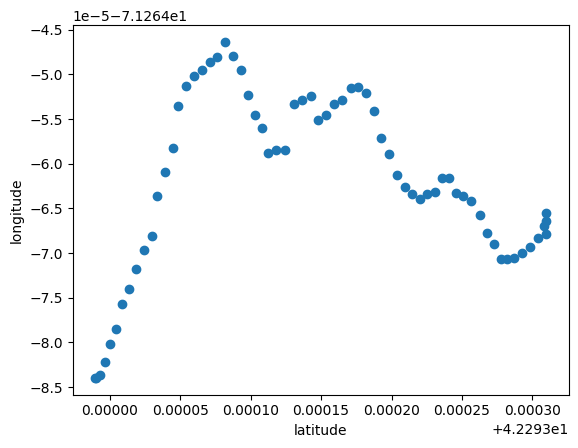

In [42]:
lat_lons = np.array(list(map(lambda x: (x['latitude'], x['longitude']), alldata['savedRouteGeospatialLocations'])))
plt.scatter(lat_lons[:,0], lat_lons[:,1])
print(lat_lons)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

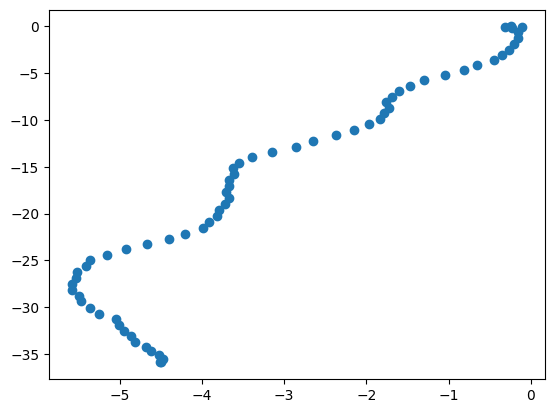

In [62]:
geoAnchorTransforms = np.array(list(map(lambda x: np.array(x['geoAnchorTransform']).reshape((4,4)), alldata['savedRouteGeospatialLocations'])))
plt.scatter(geoAnchorTransforms[:,-1,0], geoAnchorTransforms[:,-1,2])
plt.show()

## Examining GAR Anchors

These are used for alignment to the saved route.

In [75]:
for anchor in alldata['garAnchors'][-1]:
    if anchor['cloudIdentifier']:
        print(np.array(anchor['transform']).reshape((4,4)).T[:-1,-1])

[35.09945679  0.50664765 -0.24903427]
[ 5.76443481e+01 -3.08186524e-02  6.27474165e+00]
